In [1]:
import gym
import gym_pdw

import numpy as np
from matplotlib import pyplot as plt

In [2]:
env = gym.make('gym_pdw:pdw-v0')

In [17]:
# Epsilon-greedy action selection
def select_action(epsilon, state, Q):
    if np.random.uniform(0,1) < epsilon:
        action = env.random_action()
    else:
        action = np.argmax(Q[:,state[0],state[1]])
    return action

In [18]:
# Q function update 
def update(state, action, reward, next_state, next_action, E, Q):
    error = reward + gamma*Q[next_action][next_state[0],next_state[1]] - Q[action][state[0],state[1]]
    Q = Q + alpha*error*E
    
    return Q

In [19]:
def SARSA_lambda(gamma, alpha, epsilon, episodes, lambda_val):
    
    # Set the goal variant
    goal_pos = env.set_goal('A')

    # Setting terminal action-state value 
    Terminal_state = goal_pos

    # Initializing Q function values to zero
    Q = np.zeros([env.action_space.n, env.observation_space.shape[0], env.observation_space.shape[1]])

        
    steps = np.zeros([episodes])
    avg_reward = np.zeros([episodes])
    
    for episode in range(episodes):

        env.reset()
        
        curr_state = env.get_state()
        action = env.random_action()
        
        print(curr_state ,"init====================")

        E = np.zeros([env.action_space.n, env.observation_space.shape[0], env.observation_space.shape[1]])

        while True:
            
            if steps[episode] != 0:
                action = select_action(epsilon, curr_state, Q)
            
            next_state, reward = env.step(action)
            next_action = select_action(epsilon, next_state, Q)

            # Update eligibility traces
            E *= gamma*lambda_val
            E[action][curr_state[0],curr_state[1]] += 1
            
            # Update Q values
            Q = update(curr_state, action, reward, next_state, next_action, E, Q)
            
            
            steps[episode] +=1
            avg_reward[episode] = avg_reward[episode] + (reward - avg_reward[episode])/steps[episode]
            
            
            curr_state = next_state
            print(curr_state, "curr_state", env.start_positions)

            if curr_state == goal_pos:
                print("yes", steps[episode])
                break
    
    return avg_reward, steps, Q

In [20]:
def plot_sarsa_lambda(avg_reward, steps, episodes):
    '''
    Gets the data for all curves and plots them in one graph
    '''

    
    # Figure instances will be returned.
    fig1=plt.figure(figsize=(10,6)).add_subplot(111)
    fig2=plt.figure(figsize=(10,6)).add_subplot(111)

    # colors for different values of epsilon
    colors = ['g', 'r', 'k', 'b', 'y','m', 'c']

    fig1.plot(range(episodes), avg_reward, colors[0], label = " Average reward " )
    fig2.plot(range(episodes), steps, colors[1], label = " Steps")

    # Labelling the plot
    fig1.title.set_text('SARSA avg reward')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('episodes')
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Labelling the plot
    fig2.title.set_text('SARSA num steps')
    fig2.set_ylabel('Steps')
    fig2.set_xlabel('episodes')
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Display the plot
#     plt.show()


In [21]:
def plot_compare(avg_reward_all, steps_all, lambda_vals):
    
    # Figure instances will be returned.
    fig1=plt.figure(figsize=(10,6)).add_subplot(111)
    fig2=plt.figure(figsize=(10,6)).add_subplot(111)

    # colors for different values of c
    colors = ['k', 'r', 'g', 'm', 'y','k', 'c']

    # For each value of c, plot the average reward vs steps
    for i in range(len(avg_reward_all)):
        fig1.plot(range(episodes), steps_all[i], colors[i], label = "lambda = " + str(lambda_vals[i]) )
    
    # For each c, plot the % times optimal arm selected vs steps
    for i in range(len(steps_all)):
        fig2.plot(range(episodes), steps_all[i], colors[i], label = "lambda = " + str(lambda_vals[i]) )
    
    # Labelling the  plot
    fig1.title.set_text('For all lambdas Average reward vs episodes')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('episodes')
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    # Labelling the plot
    fig2.title.set_text('For all lambdas steps vs episodes')
    fig2.set_ylabel('Steps')
    fig2.set_xlabel('episodes')
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Display the plot
    plt.show()



[[0, 11], [0, 11], [0, 11], [0, 11]] 2
[0, 11]
[0, 11] init====================
[0, 10] curr_state [[0, 11], [0, 11], [0, 10], [0, 11]]
[0, 11] curr_state [[0, 11], [0, 11], [0, 11], [0, 11]]
yes 2.0
[[0, 11], [0, 11], [0, 11], [0, 11]] 0
[0, 11]
[0, 11] init====================
[0, 11] curr_state [[0, 11], [0, 11], [0, 11], [0, 11]]
yes 1.0
[[0, 11], [0, 11], [0, 11], [0, 11]] 2
[0, 11]
[0, 11] init====================
[0, 11] curr_state [[0, 11], [0, 11], [0, 11], [0, 11]]
yes 1.0
[[0, 11], [0, 11], [0, 11], [0, 11]] 0
[0, 11]
[0, 11] init====================
[1, 11] curr_state [[1, 11], [0, 11], [0, 11], [0, 11]]
[1, 11] curr_state [[1, 11], [0, 11], [0, 11], [0, 11]]
[0, 11] curr_state [[0, 11], [0, 11], [0, 11], [0, 11]]
yes 3.0
[[0, 11], [0, 11], [0, 11], [0, 11]] 1
[0, 11]
[0, 11] init====================
[0, 11] curr_state [[0, 11], [0, 11], [0, 11], [0, 11]]
yes 1.0
[[0, 11], [0, 11], [0, 11], [0, 11]] 3
[0, 11]
[0, 11] init====================
[0, 11] curr_state [[0, 11], [0,

[11, 11] curr_state [[0, 11], [11, 11], [0, 11], [0, 11]]
[11, 11] curr_state [[0, 11], [11, 11], [0, 11], [0, 11]]
[11, 11] curr_state [[0, 11], [11, 11], [0, 11], [0, 11]]
[11, 11] curr_state [[0, 11], [11, 11], [0, 11], [0, 11]]
[11, 11] curr_state [[0, 11], [11, 11], [0, 11], [0, 11]]
[11, 10] curr_state [[0, 11], [11, 10], [0, 11], [0, 11]]
[11, 10] curr_state [[0, 11], [11, 10], [0, 11], [0, 11]]
[11, 10] curr_state [[0, 11], [11, 10], [0, 11], [0, 11]]
[11, 10] curr_state [[0, 11], [11, 10], [0, 11], [0, 11]]
[11, 10] curr_state [[0, 11], [11, 10], [0, 11], [0, 11]]
[11, 10] curr_state [[0, 11], [11, 10], [0, 11], [0, 11]]
[10, 10] curr_state [[0, 11], [10, 10], [0, 11], [0, 11]]
[10, 9] curr_state [[0, 11], [10, 9], [0, 11], [0, 11]]
[10, 10] curr_state [[0, 11], [10, 10], [0, 11], [0, 11]]
[10, 10] curr_state [[0, 11], [10, 10], [0, 11], [0, 11]]
[9, 10] curr_state [[0, 11], [9, 10], [0, 11], [0, 11]]
[9, 10] curr_state [[0, 11], [9, 10], [0, 11], [0, 11]]
[10, 10] curr_state 

[2, 10] curr_state [[0, 11], [2, 10], [0, 11], [0, 11]]
[2, 10] curr_state [[0, 11], [2, 10], [0, 11], [0, 11]]
[2, 11] curr_state [[0, 11], [2, 11], [0, 11], [0, 11]]
[2, 11] curr_state [[0, 11], [2, 11], [0, 11], [0, 11]]
[1, 11] curr_state [[0, 11], [1, 11], [0, 11], [0, 11]]
[1, 11] curr_state [[0, 11], [1, 11], [0, 11], [0, 11]]
[0, 11] curr_state [[0, 11], [0, 11], [0, 11], [0, 11]]
yes 30.0
[[0, 11], [0, 11], [0, 11], [0, 11]] 3
[0, 11]
[0, 11] init====================
[0, 11] curr_state [[0, 11], [0, 11], [0, 11], [0, 11]]
yes 1.0
[[0, 11], [0, 11], [0, 11], [0, 11]] 2
[0, 11]
[0, 11] init====================
[0, 11] curr_state [[0, 11], [0, 11], [0, 11], [0, 11]]
yes 1.0
[[0, 11], [0, 11], [0, 11], [0, 11]] 1
[0, 11]
[0, 11] init====================
[0, 11] curr_state [[0, 11], [0, 11], [0, 11], [0, 11]]
yes 1.0
[[0, 11], [0, 11], [0, 11], [0, 11]] 0
[0, 11]
[0, 11] init====================
[0, 11] curr_state [[0, 11], [0, 11], [0, 11], [0, 11]]
yes 1.0
[[0, 11], [0, 11], [0, 

[0, 11] curr_state [[0, 11], [0, 11], [0, 11], [0, 11]]
yes 1.0
[[0, 11], [0, 11], [0, 11], [0, 11]] 2
[0, 11]
[0, 11] init====================
[0, 11] curr_state [[0, 11], [0, 11], [0, 11], [0, 11]]
yes 1.0
[[0, 11], [0, 11], [0, 11], [0, 11]] 0
[0, 11]
[0, 11] init====================
[0, 10] curr_state [[0, 10], [0, 11], [0, 11], [0, 11]]
[1, 11] curr_state [[1, 11], [0, 11], [0, 11], [0, 11]]
[1, 11] curr_state [[1, 11], [0, 11], [0, 11], [0, 11]]
[0, 11] curr_state [[0, 11], [0, 11], [0, 11], [0, 11]]
yes 4.0
[[0, 11], [0, 11], [0, 11], [0, 11]] 2
[0, 11]
[0, 11] init====================
[0, 11] curr_state [[0, 11], [0, 11], [0, 11], [0, 11]]
yes 1.0
[[0, 11], [0, 11], [0, 11], [0, 11]] 2
[0, 11]
[0, 11] init====================
[0, 10] curr_state [[0, 11], [0, 11], [0, 10], [0, 11]]
[0, 10] curr_state [[0, 11], [0, 11], [0, 10], [0, 11]]
[0, 10] curr_state [[0, 11], [0, 11], [0, 10], [0, 11]]
[0, 10] curr_state [[0, 11], [0, 11], [0, 10], [0, 11]]
[0, 10] curr_state [[0, 11], [0,

[3, 10] curr_state [[0, 11], [3, 10], [0, 11], [0, 11]]
[4, 10] curr_state [[0, 11], [4, 10], [0, 11], [0, 11]]
[5, 10] curr_state [[0, 11], [5, 10], [0, 11], [0, 11]]
[5, 10] curr_state [[0, 11], [5, 10], [0, 11], [0, 11]]
[5, 10] curr_state [[0, 11], [5, 10], [0, 11], [0, 11]]
[5, 10] curr_state [[0, 11], [5, 10], [0, 11], [0, 11]]
[5, 10] curr_state [[0, 11], [5, 10], [0, 11], [0, 11]]
[5, 10] curr_state [[0, 11], [5, 10], [0, 11], [0, 11]]
[6, 10] curr_state [[0, 11], [6, 10], [0, 11], [0, 11]]
[7, 11] curr_state [[0, 11], [7, 11], [0, 11], [0, 11]]
[7, 11] curr_state [[0, 11], [7, 11], [0, 11], [0, 11]]
[8, 11] curr_state [[0, 11], [8, 11], [0, 11], [0, 11]]
[8, 11] curr_state [[0, 11], [8, 11], [0, 11], [0, 11]]
[7, 11] curr_state [[0, 11], [7, 11], [0, 11], [0, 11]]
[7, 11] curr_state [[0, 11], [7, 11], [0, 11], [0, 11]]
[6, 11] curr_state [[0, 11], [6, 11], [0, 11], [0, 11]]
[6, 10] curr_state [[0, 11], [6, 10], [0, 11], [0, 11]]
[6, 10] curr_state [[0, 11], [6, 10], [0, 11], [

[3, 10] curr_state [[0, 11], [0, 11], [0, 11], [3, 10]]
[2, 11] curr_state [[0, 11], [0, 11], [0, 11], [2, 11]]
[2, 11] curr_state [[0, 11], [0, 11], [0, 11], [2, 11]]
[2, 10] curr_state [[0, 11], [0, 11], [0, 11], [2, 10]]
[2, 11] curr_state [[0, 11], [0, 11], [0, 11], [2, 11]]
[2, 11] curr_state [[0, 11], [0, 11], [0, 11], [2, 11]]
[2, 11] curr_state [[0, 11], [0, 11], [0, 11], [2, 11]]
[2, 11] curr_state [[0, 11], [0, 11], [0, 11], [2, 11]]
[2, 11] curr_state [[0, 11], [0, 11], [0, 11], [2, 11]]
[2, 11] curr_state [[0, 11], [0, 11], [0, 11], [2, 11]]
[2, 11] curr_state [[0, 11], [0, 11], [0, 11], [2, 11]]
[2, 11] curr_state [[0, 11], [0, 11], [0, 11], [2, 11]]
[2, 11] curr_state [[0, 11], [0, 11], [0, 11], [2, 11]]
[1, 11] curr_state [[0, 11], [0, 11], [0, 11], [1, 11]]
[0, 11] curr_state [[0, 11], [0, 11], [0, 11], [0, 11]]
yes 136.0
[[0, 11], [0, 11], [0, 11], [0, 11]] 3
[0, 11]
[0, 11] init====================
[0, 11] curr_state [[0, 11], [0, 11], [0, 11], [0, 11]]
yes 1.0
[[0, 1

[4, 10] curr_state [[0, 11], [0, 11], [4, 10], [0, 11]]
[5, 11] curr_state [[0, 11], [0, 11], [5, 11], [0, 11]]
[4, 11] curr_state [[0, 11], [0, 11], [4, 11], [0, 11]]
[4, 11] curr_state [[0, 11], [0, 11], [4, 11], [0, 11]]
[4, 11] curr_state [[0, 11], [0, 11], [4, 11], [0, 11]]
[4, 11] curr_state [[0, 11], [0, 11], [4, 11], [0, 11]]
[5, 11] curr_state [[0, 11], [0, 11], [5, 11], [0, 11]]
[5, 11] curr_state [[0, 11], [0, 11], [5, 11], [0, 11]]
[5, 11] curr_state [[0, 11], [0, 11], [5, 11], [0, 11]]
[5, 11] curr_state [[0, 11], [0, 11], [5, 11], [0, 11]]
[5, 11] curr_state [[0, 11], [0, 11], [5, 11], [0, 11]]
[5, 11] curr_state [[0, 11], [0, 11], [5, 11], [0, 11]]
[5, 10] curr_state [[0, 11], [0, 11], [5, 10], [0, 11]]
[4, 10] curr_state [[0, 11], [0, 11], [4, 10], [0, 11]]
[4, 10] curr_state [[0, 11], [0, 11], [4, 10], [0, 11]]
[3, 10] curr_state [[0, 11], [0, 11], [3, 10], [0, 11]]
[4, 11] curr_state [[0, 11], [0, 11], [4, 11], [0, 11]]
[4, 10] curr_state [[0, 11], [0, 11], [4, 10], [

[9, 11] curr_state [[0, 11], [0, 11], [9, 11], [0, 11]]
[8, 11] curr_state [[0, 11], [0, 11], [8, 11], [0, 11]]
[9, 11] curr_state [[0, 11], [0, 11], [9, 11], [0, 11]]
[9, 11] curr_state [[0, 11], [0, 11], [9, 11], [0, 11]]
[9, 11] curr_state [[0, 11], [0, 11], [9, 11], [0, 11]]
[9, 11] curr_state [[0, 11], [0, 11], [9, 11], [0, 11]]
[9, 11] curr_state [[0, 11], [0, 11], [9, 11], [0, 11]]
[9, 10] curr_state [[0, 11], [0, 11], [9, 10], [0, 11]]
[9, 11] curr_state [[0, 11], [0, 11], [9, 11], [0, 11]]
[10, 11] curr_state [[0, 11], [0, 11], [10, 11], [0, 11]]
[10, 11] curr_state [[0, 11], [0, 11], [10, 11], [0, 11]]
[9, 11] curr_state [[0, 11], [0, 11], [9, 11], [0, 11]]
[9, 11] curr_state [[0, 11], [0, 11], [9, 11], [0, 11]]
[9, 11] curr_state [[0, 11], [0, 11], [9, 11], [0, 11]]
[9, 11] curr_state [[0, 11], [0, 11], [9, 11], [0, 11]]
[9, 11] curr_state [[0, 11], [0, 11], [9, 11], [0, 11]]
[9, 10] curr_state [[0, 11], [0, 11], [9, 10], [0, 11]]
[8, 11] curr_state [[0, 11], [0, 11], [8, 11

[7, 11] curr_state [[7, 11], [0, 11], [0, 11], [0, 11]]
[7, 11] curr_state [[7, 11], [0, 11], [0, 11], [0, 11]]
[7, 11] curr_state [[7, 11], [0, 11], [0, 11], [0, 11]]
[7, 11] curr_state [[7, 11], [0, 11], [0, 11], [0, 11]]
[7, 11] curr_state [[7, 11], [0, 11], [0, 11], [0, 11]]
[7, 11] curr_state [[7, 11], [0, 11], [0, 11], [0, 11]]
[8, 11] curr_state [[8, 11], [0, 11], [0, 11], [0, 11]]
[8, 11] curr_state [[8, 11], [0, 11], [0, 11], [0, 11]]
[8, 10] curr_state [[8, 10], [0, 11], [0, 11], [0, 11]]
[8, 9] curr_state [[8, 9], [0, 11], [0, 11], [0, 11]]
[8, 9] curr_state [[8, 9], [0, 11], [0, 11], [0, 11]]
[9, 10] curr_state [[9, 10], [0, 11], [0, 11], [0, 11]]
[9, 10] curr_state [[9, 10], [0, 11], [0, 11], [0, 11]]
[9, 11] curr_state [[9, 11], [0, 11], [0, 11], [0, 11]]
[10, 11] curr_state [[10, 11], [0, 11], [0, 11], [0, 11]]
[9, 11] curr_state [[9, 11], [0, 11], [0, 11], [0, 11]]
[9, 10] curr_state [[9, 10], [0, 11], [0, 11], [0, 11]]
[9, 9] curr_state [[9, 9], [0, 11], [0, 11], [0, 1

[8, 11] curr_state [[0, 11], [8, 11], [0, 11], [0, 11]]
[7, 11] curr_state [[0, 11], [7, 11], [0, 11], [0, 11]]
[6, 11] curr_state [[0, 11], [6, 11], [0, 11], [0, 11]]
[6, 11] curr_state [[0, 11], [6, 11], [0, 11], [0, 11]]
[6, 10] curr_state [[0, 11], [6, 10], [0, 11], [0, 11]]
[5, 10] curr_state [[0, 11], [5, 10], [0, 11], [0, 11]]
[4, 11] curr_state [[0, 11], [4, 11], [0, 11], [0, 11]]
[5, 11] curr_state [[0, 11], [5, 11], [0, 11], [0, 11]]
[5, 11] curr_state [[0, 11], [5, 11], [0, 11], [0, 11]]
[4, 11] curr_state [[0, 11], [4, 11], [0, 11], [0, 11]]
[3, 11] curr_state [[0, 11], [3, 11], [0, 11], [0, 11]]
[3, 11] curr_state [[0, 11], [3, 11], [0, 11], [0, 11]]
[3, 11] curr_state [[0, 11], [3, 11], [0, 11], [0, 11]]
[3, 10] curr_state [[0, 11], [3, 10], [0, 11], [0, 11]]
[4, 11] curr_state [[0, 11], [4, 11], [0, 11], [0, 11]]
[3, 11] curr_state [[0, 11], [3, 11], [0, 11], [0, 11]]
[3, 11] curr_state [[0, 11], [3, 11], [0, 11], [0, 11]]
[3, 11] curr_state [[0, 11], [3, 11], [0, 11], [

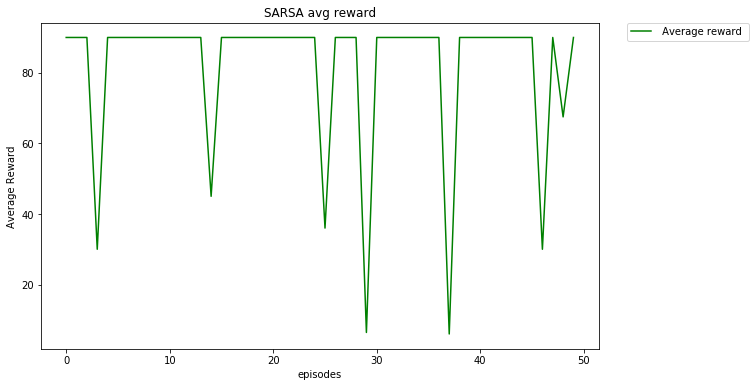

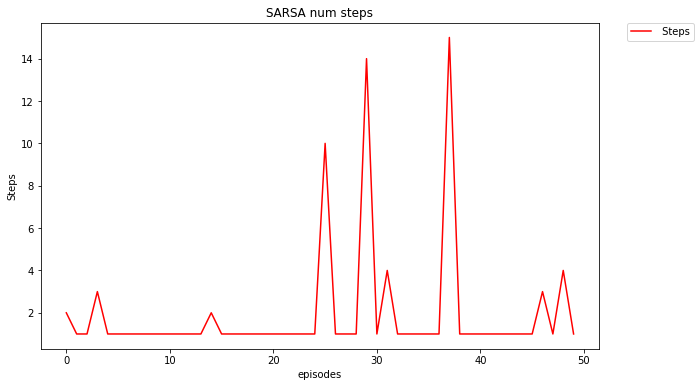

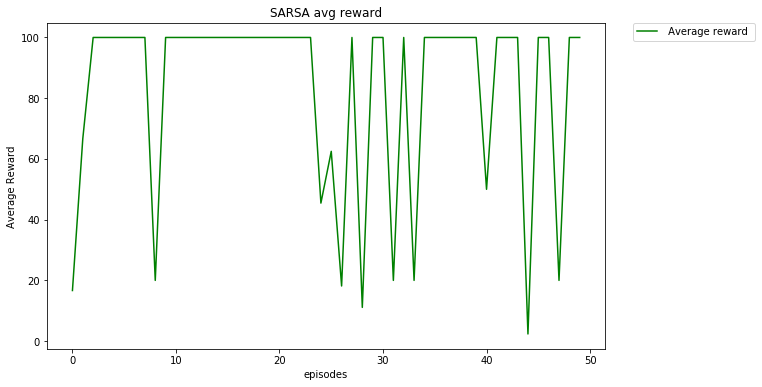

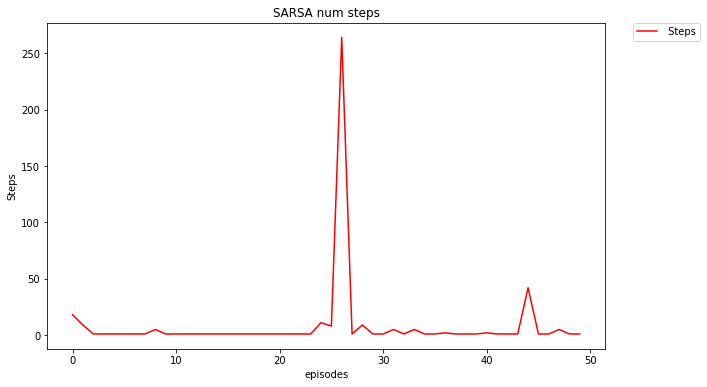

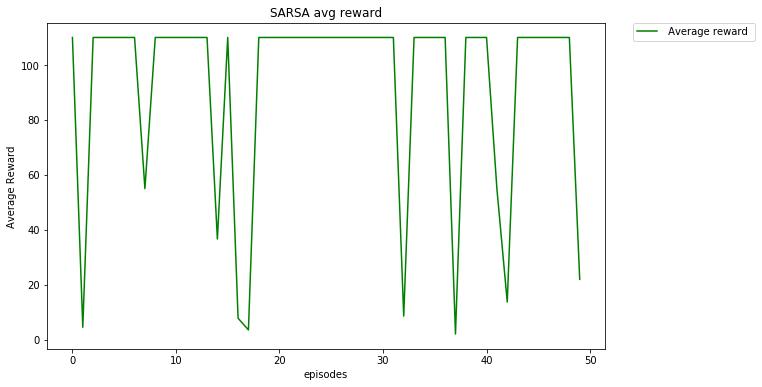

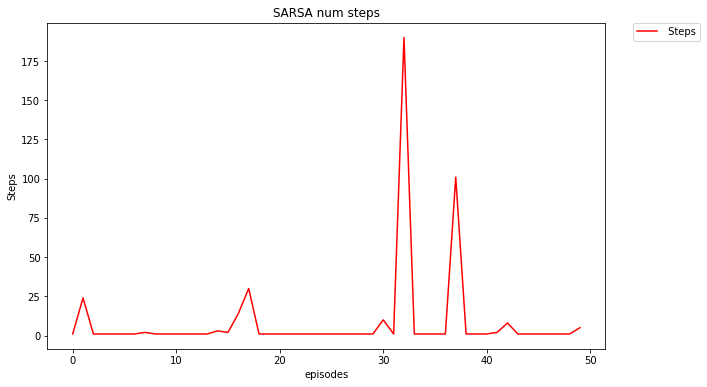

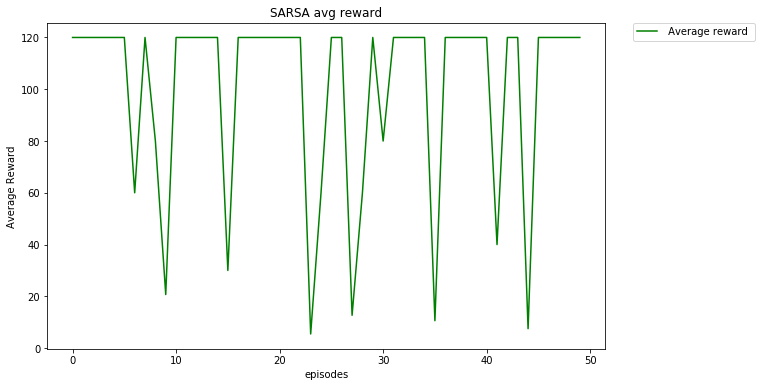

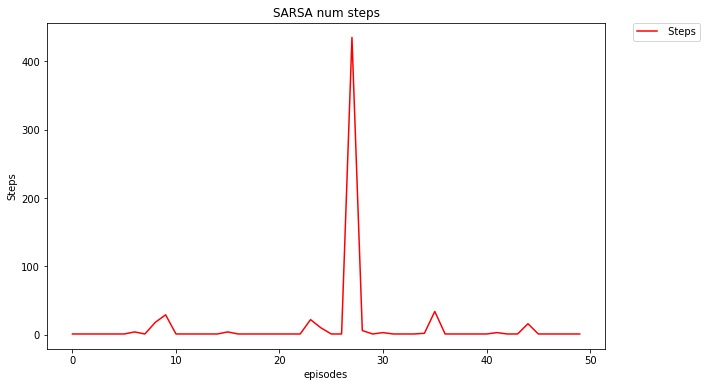

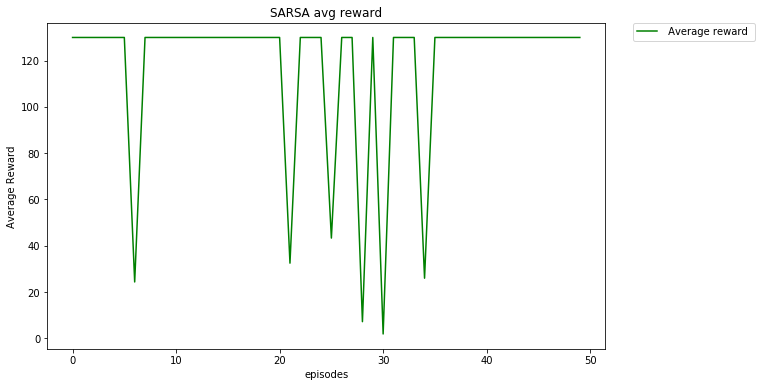

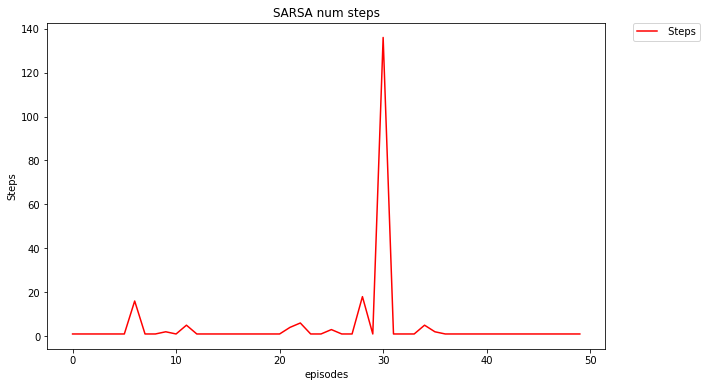

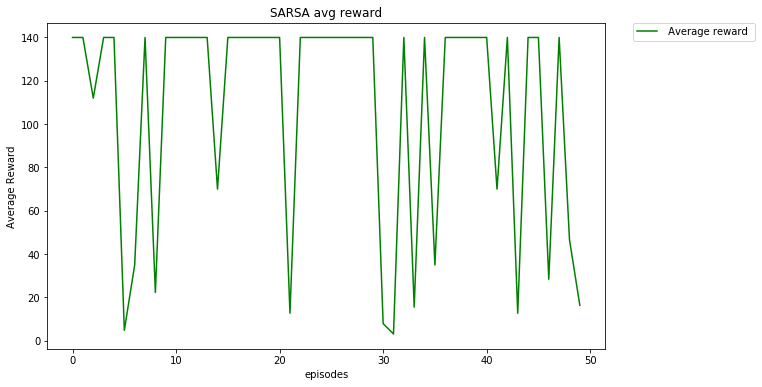

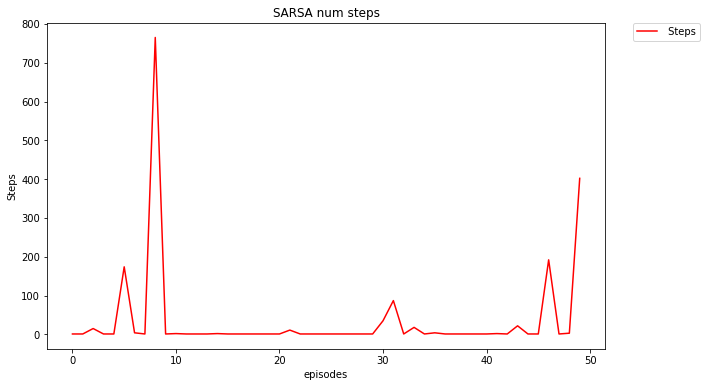

In [22]:
if __name__=='__main__':
    # parameters
    gamma = 0.9
    alpha = 0.01
    epsilon = 0.1
    episodes = 50
    
    lambda_vals = [0, 0.3, 0.5, 0.9, 0.99, 1.0]
    
    avg_reward_all = []
    steps_all = []
    
    for i in range(len(lambda_vals)):
        avg_reward, steps, Q = SARSA_lambda(gamma,alpha,epsilon, episodes, lambda_vals[i])
        
        avg_reward_all.append(avg_reward)
        steps_all.append(steps)
        
        plot_sarsa_lambda(avg_reward_all[i], steps_all[i], episodes)
    plt.show
    